In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**





In [ ]:
df=pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# **Cleaning**

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [ ]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# **EDA**

In [ ]:
print(df['Age'].head())

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


In [ ]:
df.iloc[20]

,20
PassengerId,21
Survived,0
Pclass,2
Sex,male
Age,35.0
SibSp,0
Parch,0
Fare,26.0
Embarked,S


In [ ]:
df.loc[1,'Age']

np.float64(38.0)

In [ ]:
older_passengers=df[df['Age']>35]

In [ ]:
older_passengers

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
6,7,0,1,male,54.0,0,0,51.8625,S
11,12,1,1,female,58.0,0,0,26.5500,S
13,14,0,3,male,39.0,1,5,31.2750,S
15,16,1,2,female,55.0,0,0,16.0000,S
...,...,...,...,...,...,...,...,...,...
865,866,1,2,female,42.0,0,0,13.0000,S
871,872,1,1,female,47.0,1,1,52.5542,S
873,874,0,3,male,47.0,0,0,9.0000,S
879,880,1,1,female,56.0,0,1,83.1583,C


In [ ]:
sort_df=df.sort_values(by='Fare',ascending=False)

In [ ]:
sort_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
679,680,1,1,male,36.000000,0,1,512.3292,C
258,259,1,1,female,35.000000,0,0,512.3292,C
737,738,1,1,male,35.000000,0,0,512.3292,C
88,89,1,1,female,23.000000,3,2,263.0000,S
438,439,0,1,male,64.000000,1,4,263.0000,S
...,...,...,...,...,...,...,...,...,...
806,807,0,1,male,39.000000,0,0,0.0000,S
815,816,0,1,male,29.699118,0,0,0.0000,S
466,467,0,2,male,29.699118,0,0,0.0000,S
481,482,0,2,male,29.699118,0,0,0.0000,S


In [ ]:
sur=df['Survived'].mean()

In [ ]:
print(f"{sur:.2%}")

38.38%


In [ ]:
sur_gender=df.groupby('Sex')['Survived'].mean()

In [ ]:
sur_gender

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
sur_class=df.groupby('Pclass')['Survived'].mean()
sur_class

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


# **Visualization**

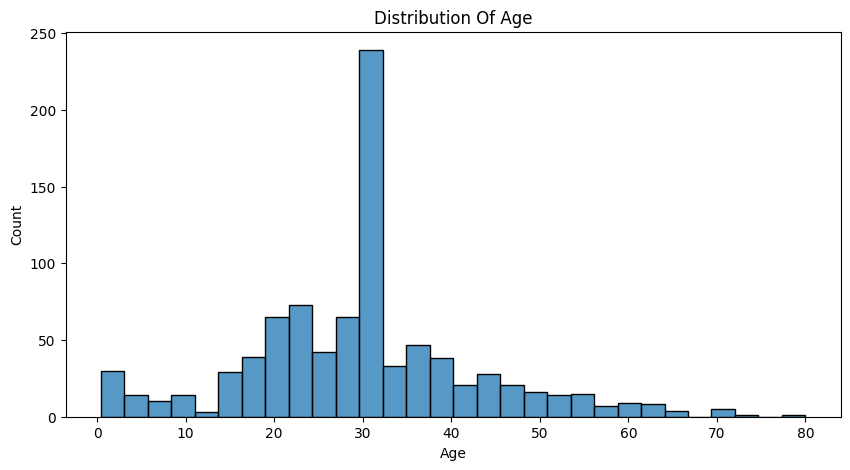

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'],bins=30)
plt.title("Distribution Of Age")
plt.show()

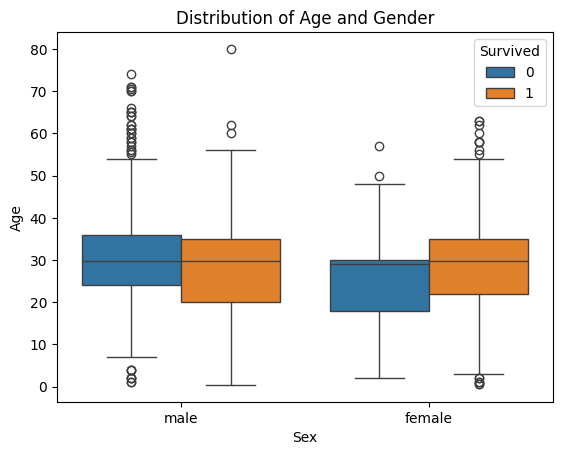

In [ ]:
sns.boxplot(x='Sex',y='Age',hue='Survived',data=df)
plt.title("Distribution of Age and Gender")
plt.show()

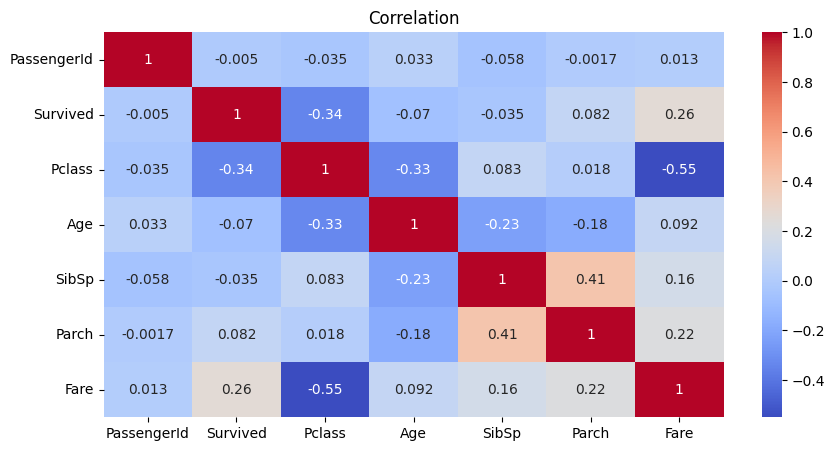

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.drop(['Embarked','Sex'],axis=1).corr(),annot=True,cmap="coolwarm")
plt.title("Correlation")
plt.show()

# **Prediction**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
features=['Pclass','Sex','Age','Fare']
df['Sex']=df['Sex'].map({'male':1,'female':0})

In [ ]:
x=df[features]
y=df['Survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)#1 0 32 70

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8268156424581006


In [ ]:
new=pd.DataFrame([[3,1,27,8.6625]],columns=features)

In [ ]:
pred=model.predict(new)
print(pred[0])

0
